In [1]:
from sklearn.datasets import make_classification

In [3]:
X, Y = make_classification(n_samples=1000, n_classes=2, n_features=5, n_redundant=0, random_state=1)


In [5]:
X.shape

(1000, 5)

In [6]:
Y.shape

(1000,)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
X_train.shape, Y_train.shape

((800, 5), (800,))

In [11]:
X_test.shape, Y_test.shape

((200, 5), (200,))

In [12]:
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [13]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

In [17]:
scores=[]
for name,clf in zip(names,classifiers):
    clf.fit(X_train,Y_train)
    score=clf.score(X_test,Y_test)
    scores.append(score)

In [18]:
scores

[0.85,
 0.84,
 0.76,
 0.835,
 0.865,
 0.86,
 0.87,
 0.845,
 0.865,
 0.845,
 0.87,
 0.845,
 0.835,
 0.83]

In [22]:
import pandas as pd
import seaborn as sns

In [23]:
df=pd.DataFrame()

In [36]:
df['name']=names
df["score"]=scores
df.sort_values(by=['score'],ascending=False).reset_index(drop=True)


,name,score
0,Decision_Tree,0.870
1,AdaBoost,0.870
2,Gaussian_Process,0.865
3,Random_Forest,0.865
4,Gradient_Boosting,0.860
5,Nearest_Neighbors,0.850
6,Extra_Trees,0.845
7,Neural_Net,0.845
8,Naive_Bayes,0.845
9,Linear_SVM,0.840


In [41]:
df1=df.sort_values(by=['score'],ascending=False).reset_index(drop=True)


In [31]:
df

,name,score
0,Nearest_Neighbors,0.850
1,Linear_SVM,0.840
2,Polynomial_SVM,0.760
3,RBF_SVM,0.835
4,Gaussian_Process,0.865
5,Gradient_Boosting,0.860
6,Decision_Tree,0.870
7,Extra_Trees,0.845
8,Random_Forest,0.865
9,Neural_Net,0.845


In [53]:
cm=sns.light_palette("blue",as_cmap=True)
s=df.style.background_gradient(cmap=cm)
s

,name,score
0,Nearest_Neighbors,0.850000
1,Linear_SVM,0.840000
2,Polynomial_SVM,0.760000
3,RBF_SVM,0.835000
4,Gaussian_Process,0.865000
5,Gradient_Boosting,0.860000
6,Decision_Tree,0.870000
7,Extra_Trees,0.845000
8,Random_Forest,0.865000
9,Neural_Net,0.845000


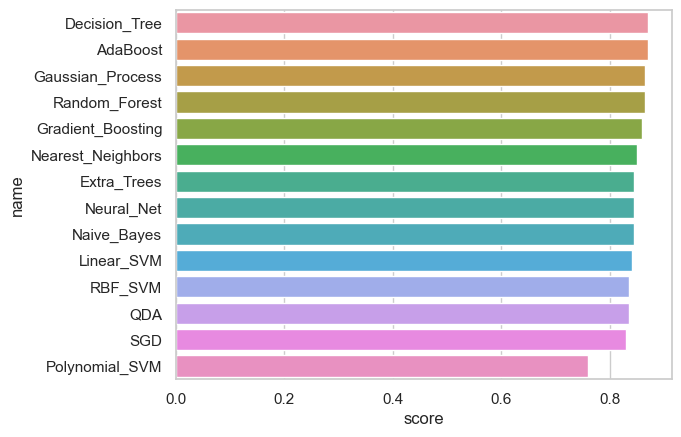

In [49]:
sns.set(style="whitegrid")
ax=sns.barplot(y="name",x="score",data=df1)